In [2]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [16]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [14]:
from glob import glob
from PIL import Image
import cv2

train=pd.read_csv('train/train.csv')
test=pd.read_csv('test.csv')

Images='train/kaggle_images/'
# Glob the directories and get the lists of train and test images
img = glob(Images + '*')

In [5]:
# Compute at the number of images:
print('Total Number of images is {}'.format(len(img)))

Total Number of images is 8196


In [6]:
print('Number of image in train data are {}'.format(train.shape[0]))
train.head()

Number of image in train data are 5733


,Name,HeadCount
0,10001.jpg,4
1,10002.jpg,4
2,10003.jpg,2
3,10004.jpg,3
4,10006.jpg,4


In [7]:
print('Number of image in test data are {}'.format(test.shape[0]))
test.head()

Number of image in test data are 2463


,Name
0,10005.jpg
1,10009.jpg
2,10015.jpg
3,10022.jpg
4,10023.jpg


In [8]:
bbox=pd.read_csv('train/bbox_train.csv')
bbox.head()

,Name,width,height,xmin,ymin,xmax,ymax
0,10001.jpg,612,408,192,199,230,235
1,10001.jpg,612,408,247,168,291,211
2,10001.jpg,612,408,321,176,366,222
3,10001.jpg,612,408,355,183,387,214
4,10002.jpg,612,408,339,165,378,202


In [10]:
# Merge all train images with the bounding boxes dataframe

train_images = train.merge(bbox, on='Name', how='left')
print(train_images.isnull().sum())
print(train_images.shape)
train_images

Name         0
HeadCount    0
width        0
height       0
xmin         0
ymin         0
xmax         0
ymax         0
dtype: int64
(24533, 8)


,Name,HeadCount,width,height,xmin,ymin,xmax,ymax
0,10001.jpg,4,612,408,192,199,230,235
1,10001.jpg,4,612,408,247,168,291,211
2,10001.jpg,4,612,408,321,176,366,222
3,10001.jpg,4,612,408,355,183,387,214
4,10002.jpg,4,612,408,339,165,378,202
...,...,...,...,...,...,...,...,...
24528,18205.jpg,8,612,425,9,52,52,116
24529,18207.jpg,4,475,612,160,149,241,226
24530,18207.jpg,4,475,612,226,47,277,104
24531,18207.jpg,4,475,612,113,41,179,106


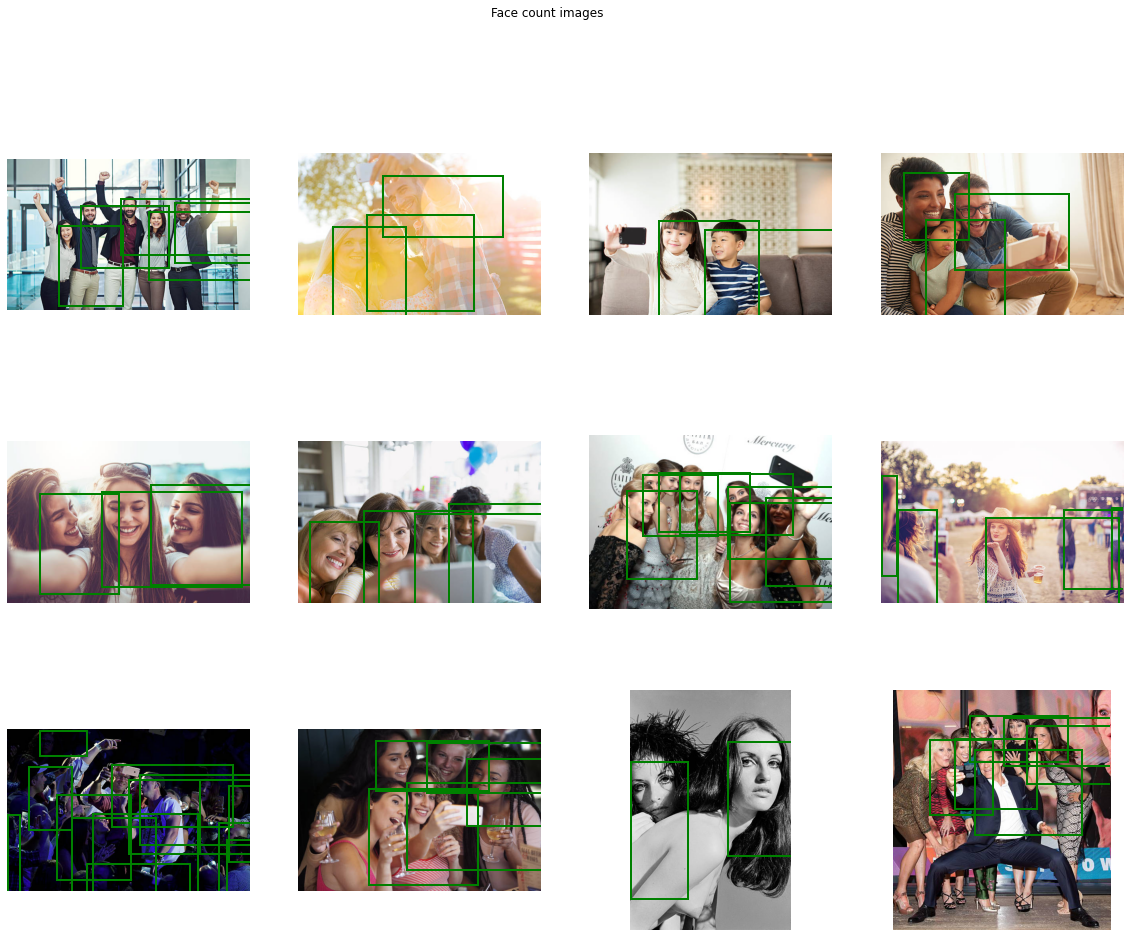

In [17]:
# First we store all the box dimensions.
def get_all_bboxes(df, image_id):
    image_bboxes = df[df.Name == image_id]
    
    bboxes = []
    for _,row in image_bboxes.iterrows():
        bboxes.append((row.xmin, row.ymin, row.xmax, row.ymax))
        
    return bboxes

# function for box representation on the image.

def plot_image_with_box(df, rows=3, cols=4, title='Face count images'):
    fig, axs = plt.subplots(rows, cols, figsize=(20,15))
    for row in range(rows):
        for col in range(cols):
            idx = np.random.randint(len(df), size=1)[0]
            img_id = df.iloc[idx].Name
            
            img = Image.open(Images + img_id)
            axs[row, col].imshow(img)
            
            bboxes = get_all_bboxes(df, img_id)
            
            for bbox in bboxes:
                rect = patches.Rectangle((bbox[0],bbox[1]),bbox[2],bbox[3],linewidth=2,edgecolor='g',facecolor='none')
                axs[row, col].add_patch(rect)
            
            axs[row, col].axis('off')
            
    plt.suptitle(title)

plot_image_with_box(train_images)

In [24]:
train

,Name,HeadCount
0,10001.jpg,4
1,10002.jpg,4
2,10003.jpg,2
3,10004.jpg,3
4,10006.jpg,4
...,...,...
5728,18201.jpg,2
5729,18203.jpg,3
5730,18204.jpg,5
5731,18205.jpg,8


4


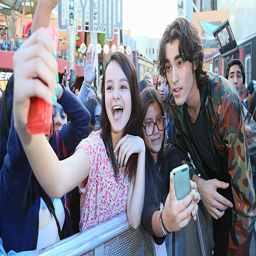

In [55]:
# Importing Image from PIL package
from PIL import Image
import random

img_array = []
img_data = []
X = []
Y=[]
train_vals = pd.read_csv('train/train.csv', sep=",")
filename = train_vals["Name"] 
eval = train_vals["HeadCount"]
print(eval[0])
i=0;
j=0;

# creating image objects
while i<100:
    #print(str(10001+i+j) + ".jpg")
    img_data = []
    if(filename[i] == str(10001+i+j) + ".jpg" and filename[i] != "10070.jpg"):
        im = Image.open("train/kaggle_images/" + str(10001+i+j) + ".jpg")
        newsize = (256, 256)
        im = im.resize(newsize)
        px = im.load()
        for a in range(0, 256):
            row_data = []
            for b in range(0, 256):
                row_data.append(px[a,b][0])
            img_data.append(row_data)
        X.append(img_data)
        Y.append(eval[i])
        img_array.append(im)
    else:
        j = j + 1;
    i = i + 1;

display(img_array[7])

In [54]:
print(Y)

[4, 4, 2, 3, 4, 6, 6, 8, 4, 7, 3, 4, 2, 4, 3, 4, 4, 4, 2, 3, 2, 6, 3, 2, 2, 2, 3, 2, 5, 5, 2, 2, 2, 6, 3, 4, 2, 3, 8, 4, 4, 7, 8, 4, 7, 2, 2, 4, 5, 6, 2, 2, 2]


In [64]:
#first square building images

# Importing Image from PIL package
from PIL import Image
import random

img_array = []
img_data = []
X = []
Y = []

# creating image objects
for i in range(1000):
    img_data = []
    im = Image.open("image_detector/images/black_background.png")
    px = im.load()
    num_objects = random.randint(0, 10)
    for j in range(num_objects):
        x = random.randint(3, 60)
        y = random.randint(3, 60)
        px[x, y] = (255, 255, 0)
        px[x+1, y] = (255, 255, 0)
        px[x, y+1] = (255, 255, 0)
        px[x+1, y+1] = (255, 255, 0)
        px[x-1, y-1] = (128, 128, 0)
        px[x-1, y] = (128, 128, 0)
        px[x-1, y+1] = (128, 128, 0)
        px[x-1, y+2] = (128, 128, 0)
        px[x+2, y-1] = (128, 128, 0)
        px[x+2, y] = (128, 128, 0)
        px[x+2, y+1] = (128, 128, 0)
        px[x+2, y+2] = (128, 128, 0)
        px[x, y+2] = (128, 128, 0)
        px[x, y-1] = (128, 128, 0)
        px[x+1, y+2] = (128, 128, 0)
        px[x+1, y-1] = (128, 128, 0)
        #print (px[x, y])
    for a in range(0, 64):
        row_data = []
        for b in range(0, 64):
            row_data.append(px[a,b][0])
        img_data.append(row_data)
    X.append(img_data)
    Y.append(str(num_objects))
    img_array.append(im)
    #display(im)

In [2]:
#generate people images

# Importing Image from PIL package
from PIL import Image
import random

img_array = []
img_data = []
X = []
Y = []

# Persons to use for generation are at:
# image_detector/images/Person_X.png

p = [Image.open("image_detector/images/Person_0.png"),
     Image.open("image_detector/images/Person_1.png"),
     Image.open("image_detector/images/Person_2.png"),
     Image.open("image_detector/images/Person_3.png"),
     Image.open("image_detector/images/Person_4.png"),
     Image.open("image_detector/images/Person_5.png")]

# creating image objects
for i in range(5000):
    img_data = []
    random.shuffle(p)
    im = Image.open("image_detector/images/black_background_256.png")
    px = im.load()
    num_objects = random.randint(0, 5)
    for j in range(num_objects):
        x_loc = random.randint(-40, 60)
        if(j%2==1):
            x_loc = random.randint(100, 180)
        if(j>3):
            im.paste(p[j], (x_loc, random.randint(150, 190)), p[j])
        elif(j>1):
            im.paste(p[j], (x_loc, random.randint(90, 130)), p[j])
        else:
            im.paste(p[j], (x_loc, random.randint(0, 40)), p[j])
    for a in range(0, 256):
        row_data = []
        for b in range(0, 256):
            row_data.append(px[b,a][0])
        img_data.append(row_data)
    X.append(img_data)
    Y.append(str(num_objects))
    img_array.append(im)
    #display(im)

53


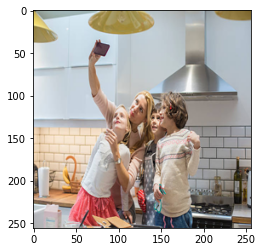

[4, 4, 2, 3, 4, 6, 6, 8, 4, 7, 3, 4, 2, 4, 3, 4, 4, 4, 2, 3, 2, 6, 3, 2, 2, 2, 3, 2, 5, 5, 2, 2, 2, 6, 3, 4, 2, 3, 8, 4, 4, 7, 8, 4, 7, 2, 2, 4, 5, 6, 2, 2, 2]


In [57]:
print(len(X))

#plt.imshow(X[17])
plt.imshow(img_array[17])
plt.show()

print(Y)

img_array[17].save("temp.png", format="PNG")

#print(X)

In [58]:
from sklearn.utils import shuffle

# compress X to two dimensions:
Z = []
for i in range(len(X)):
    img_data = []
    for a in range(0, 256):        
        for b in range(0, 256):
            img_data.append(X[i][b][a])
    Z.append(img_data)
X = Z
# shuffle the images:
X, y = shuffle(X, Y, random_state=42)

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

clf = RandomForestClassifier()
print(clf)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier()


RandomForestClassifier()

In [60]:
from sklearn.metrics import accuracy_score
preds = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test,preds))

Accuracy: 0.0


In [4]:

samples = [50, 100, 200, 300, 500, 1000]
results = [0.60, 0.90, 0.90, 0.73, 0.88, 0.86]

plt.plot(samples, results)


3


In [162]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn import metrics

NaiveBayes = GaussianNB()

NaiveBayes.fit(X_train,y_train)

predicted_values = NaiveBayes.predict(X_test)

x = metrics.accuracy_score(y_test, predicted_values)

print("Naive Bays' Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

Naive Bays' Accuracy is:  65.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      0.50      0.67         2
           2       1.00      0.50      0.67         6
           3       0.00      0.00      0.00         0
           4       0.33      1.00      0.50         2
           5       0.67      0.40      0.50         5

    accuracy                           0.65        20
   macro avg       0.67      0.57      0.56        20
weighted avg       0.85      0.65      0.69        20



/Users/ribells/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [163]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(X_train,y_train)

predicted_values = DecisionTree.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

DecisionTrees's Accuracy is:  85.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         2
           2       0.86      1.00      0.92         6
           4       0.00      0.00      0.00         2
           5       0.80      0.80      0.80         5

    accuracy                           0.85        20
   macro avg       0.73      0.76      0.74        20
weighted avg       0.81      0.85      0.83        20



In [164]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(X_train,y_train)

predicted_values = SVM.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("SVM's Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))

SVM's Accuracy is:  35.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         6
           4       0.13      1.00      0.24         2
           5       0.00      0.00      0.00         5

    accuracy                           0.35        20
   macro avg       0.23      0.40      0.25        20
weighted avg       0.26      0.35      0.27        20



/Users/ribells/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(X_train,y_train)

predicted_values = LogReg.predict(X_test)
x = metrics.accuracy_score(y_test, predicted_values)

print("Logistic Regression' Accuracy is: ", x*100)

print(classification_report(y_test,predicted_values))